# Exercise 5

Name: B.S.V.W. Munasinghe

Index Number: 190397E

# Blobs

# 1)

In [32]:
#Importing Libraries
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

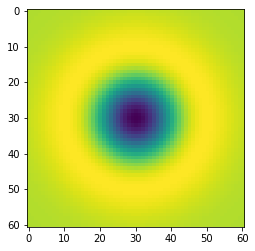

In [5]:
sigma = 10
hw = 3*sigma
X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
plt.imshow(log)

# 2)

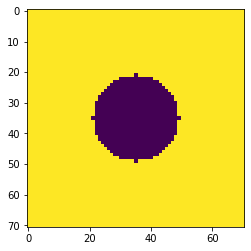

In [6]:
w,h = 71,71
hw,hh = w//2,h//2

f = np.ones((h,w),dtype=np.float32)*255
X,Y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))

r = w//5
f *= X**2 + Y**2 > r**2
plt.imshow(f)

(35, 35, 5)
10


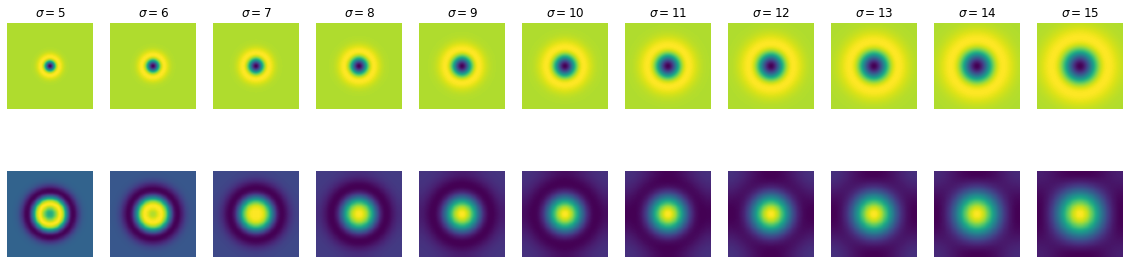

In [14]:
s = 11
fig,ax = plt.subplots(2,s,figsize=(20,5))
scale_space = np.empty((h,w,s),dtype = np.float32)
sigmas = np.arange(5,16,1)
for i,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X,Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title('$\sigma={}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')
indices = np.unravel_index(np.argmax(scale_space,axis=None),scale_space.shape)
print(indices)
print(sigmas[indices[2]])


# 3)

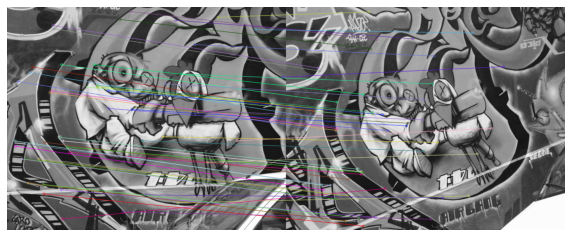

(<matplotlib.image.AxesImage at 0x274602e3820>, None)

In [35]:
from cv2 import *
# read images
img1 = cv.imread('graf/img1.ppm')  
img2 = cv.imread('graf/img2.ppm') 

img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

#sift
sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

fig,ax=plt.subplots(figsize=(10,10))
ax.axis('off')
img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()


# Fitting

# 4)

Least-square lines fitting

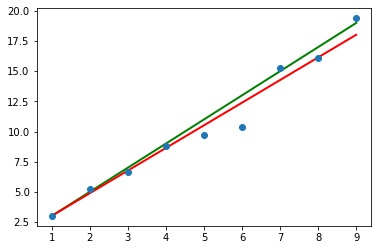

In [23]:
m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np.arange(1 ,10 , 1)
np.random.seed(45)
sigma=1
noise=sigma*np.random.randn( len(x) )
o = np.zeros ( x.shape )
# o[-1] = 20
n = len(x)
X = np.concatenate([x.reshape(n,1),np.ones((n,1))],axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y

mstar=B[0]
cstar=B[1]
y = m*x + c + noise + o

plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color='g',linewidth=2,label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color='r',linewidth=2,label=r'Estimated line')
plt.plot(x,y,'o',label='Noisy Points')

# 5)

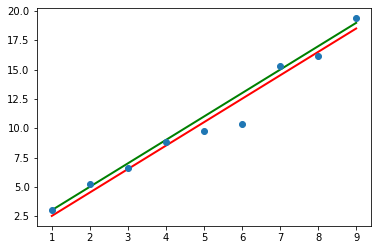

In [25]:
m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np.arange(1 ,10 , 1)
np.random.seed(45)
sigma=1
noise=sigma*np.random.randn( len(x) )
o = np.zeros ( x.shape )
# o[-1] = 20
n = len(x)

y = m*x + c + noise + o

u11 = np.sum((x-np.mean(x))**2)
u12 =  np.sum((x-np.mean(x))*(y-np.mean(y)))
u21 = u12
u22 = np.sum((y-np.mean(y))**2)

U = np.array([[u11,u12],[u21,u22]])
W,V = np.linalg.eig(U)

ev_corresponding_to_ev = V[:,np.argmin(W)]

a = ev_corresponding_to_ev[0]
b = ev_corresponding_to_ev[1]
d = a*np.mean(x) + b*np.mean(y)

mstar=-a/b
cstar=d/b

plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color='g',linewidth=2,label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color='r',linewidth=2,label=r'Estimated line')
plt.plot(x,y,'o',label='Noisy Points')